# Experiment Section on the Portfolio Reinvesetment

<p>
    In the code repository, run the code using <code>npx hardhat node</code>
</p>


In [1]:
# Importing libraries
from web3 import Web3
import json
import random
import string

Connecting to Hardhat environment.

<i><b>Note:</b> Make sure environment is up and running.</i>

In [2]:
# connecting to Hardhat node environment
# Started HTTP and WebSocket JSON-RPC server at ...
HTTP_Server = 'http://127.0.0.1:8545'

In [3]:
# Checking the web3 connection
web3 = Web3(Web3.HTTPProvider(HTTP_Server))
print("isConnected:",web3.is_connected())

isConnected: True


In [4]:
# Asserting that we have correct number of accounts
number_of_accounts = 101
accounts_list = web3.eth.accounts
assert(len(accounts_list) == number_of_accounts)

In [5]:
#getting the lists of accounts available, Account[0] will be like contract to which it will deploy smart contract account
Contract_Owner = accounts_list[0]

print(f'Contract_Owner: {Contract_Owner}')

Contract_Owner: 0xf39Fd6e51aad88F6F4ce6aB8827279cffFb92266


In [6]:
# creating instance of the the smart contract
# Getting ABI of reinvestment contract
with open('artifacts/contracts/ReinvestmentManager.sol/ReinvestmentManager.json') as f:
    contract_rm_abi = json.load(f)['abi']

# Getting ABI of AssetNFTs contract
with open('artifacts/contracts/AssetNFT.sol/AssetNFT.json') as f:
    contract_NFTAsset_abi = json.load(f)['abi']

In [7]:
# Deploying the contract: npx hardhat deploy --tags rm --network hardhat
# getting Deployed Address... NOTE THIS MIGHT CHANGE, SO MAKE SURE YOU ARE RUNNING CORRECT ADDRESS
contract_address = '0x5FbDB2315678afecb367f032d93F642f64180aa3'

In [8]:
# Creating Instance of the Smart Contract.
rm = web3.eth.contract(address=contract_address, abi = contract_rm_abi)

# Creating data sets
<p>
    <b>630 users:</b> <i>0-629.</i><br>
    <b>Salt:</b> <i>Randomly generating string of characters 65 bytes with 0x padded.</i><br>
    <b>Balance:</b> <i>Generating balance for 127 users with range 1,000 - 100,000.</i><br>
</p>

In [9]:
# functions to generate random data. 
def generate_random_salt(length=130):
    """Generate a random hexadecimal string (65 bytes) padded with 0x."""
    hex_chars = string.hexdigits.lower()
    return '0x' + ''.join(random.choice(hex_chars) for _ in range(length))

def generate_user_data(num_users=630, min_balance=1000, max_balance=100000):
    """Generate userIDs, salt, and balance for users."""
    userIDs = list(range(num_users))
    salts = [generate_random_salt() for _ in range(num_users)]
    balances = [random.randint(min_balance, max_balance) for _ in range(num_users)]
    
    return userIDs, salts, balances

# Functions to calculate gas

In [10]:
def gas_consumption(**kwargs):    
    if kwargs['solo'] == True:
        transaction_hash = kwargs['transaction']
        receipt = web3.eth.wait_for_transaction_receipt(transaction_hash).gasUsed
        return receipt

    else:
        transaction_hash = kwargs['transaction']
        receipt = web3.eth.wait_for_transaction_receipt(transaction_hash).gasUsed
        return receipt

In [11]:
# Generate dataset
userIDs, salts, balances = generate_user_data()

In [12]:
# Define subset sizes for each experiment
subset_sizes = [1, 2, 4, 8, 16, 32]
num_experiments = 10

# Initialize dictionary to hold lists for each subset size
subset_data = {size: [] for size in subset_sizes}

# Run the experiment 10 times
start_idx = 0
for experiment_num in range(num_experiments):
    print(f"\n--- Experiment {experiment_num+1} ---")
    
    for size in subset_sizes:
        end_idx = start_idx + size
        
        # Collect data for this subset
        subset_entry = {
            'userIDs': userIDs[start_idx:end_idx],
            'salts': salts[start_idx:end_idx],
            'balances': balances[start_idx:end_idx]
        }

        _ = rm.functions.addUserBatch(subset_entry['userIDs'],subset_entry['salts'],subset_entry['balances']).transact({'from':Contract_Owner })
        gas_consumed = gas_consumption(transaction = _, solo = False)
        
        # Append this subset's data to the dictionary
        subset_data[size].append(gas_consumed)
        
        start_idx = end_idx


--- Experiment 1 ---

--- Experiment 2 ---

--- Experiment 3 ---

--- Experiment 4 ---

--- Experiment 5 ---

--- Experiment 6 ---

--- Experiment 7 ---

--- Experiment 8 ---

--- Experiment 9 ---

--- Experiment 10 ---


# Simulating and calculating gas

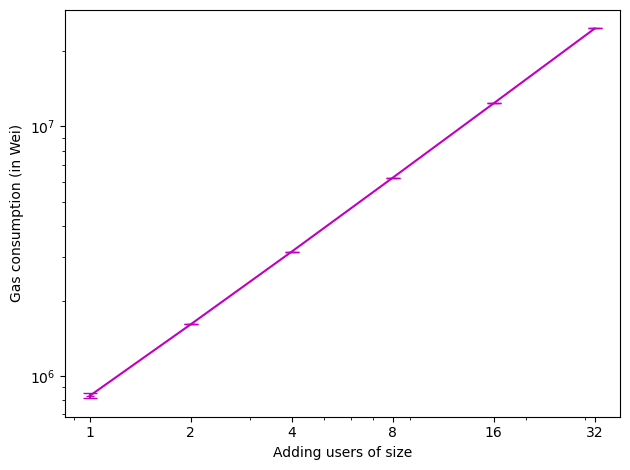

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
data = subset_data

# Calculate means and standard deviations
subset_sizes = list(data.keys())
means = [np.mean(data[size]) for size in subset_sizes]
std_devs = [np.std(data[size]) for size in subset_sizes]

# Plotting with logarithmic x-axis
plt.errorbar(subset_sizes, means, yerr=std_devs, fmt='m-_', capsize=5, label='Gas Consumption')

# Set x-axis to logarithmic scale
plt.xscale('log')
plt.yscale('log')
plt.xticks(subset_sizes, [str(x) for x in subset_sizes])

# Adding labels and title
plt.xlabel('Adding users of size')
plt.ylabel('Gas consumption (in Wei)')
# plt.title('Gas Consumption vs Subset Size')
# plt.grid(True)

#save image
plt.savefig("image.pdf", format="pdf", bbox_inches="tight")

# Show plot
plt.tight_layout()
plt.show()


## Redundant Code below

In [14]:
# # Users 0 - 9
# data_0_9_users = []
# data_0_9_salt = []
# data_0_9_balance = []

# for i in range(0,10):         
#     data_0_9_users.append(userIDs[i])
#     data_0_9_salt.append(salts[i])
#     data_0_9_balance.append(balances[i])   
    
# assert(len(data_0_9_users)==10)
# assert(len(data_0_9_salt)==10)
# assert(len(data_0_9_balance)==10)

In [15]:
# # Users 10 - 99
# data_10_99_users = []
# data_10_99_salt = []
# data_10_99_balance = []

# for i in range(10,100):         
#     data_10_99_users.append(userIDs[i])
#     data_10_99_salt.append(salts[i])
#     data_10_99_balance.append(balances[i])   
    
# assert(len(data_10_99_users)==90)
# assert(len(data_10_99_salt)==90)
# assert(len(data_10_99_balance)==90)

In [16]:
# # Users 100 - 999
# data_100_999_users = []
# data_100_999_salt = []
# data_100_999_balance = []

# for i in range(100,1000):         
#     data_100_999_users.append(userIDs[i])
#     data_100_999_salt.append(salts[i])
#     data_100_999_balance.append(balances[i])  

# assert(len(data_100_999_users)==900)
# assert(len(data_100_999_salt)==900)
# assert(len(data_100_999_balance)==900)

In [17]:
# # Users 1000 - 9999
# data_1000_9999_users = []
# data_1000_9999_salt = []
# data_1000_9999_balance = []

# for i in range(1000,10000):         
#     data_1000_9999_users.append(userIDs[i])
#     data_1000_9999_salt.append(salts[i])
#     data_1000_9999_balance.append(balances[i])  
    
# assert(len(data_1000_9999_users)==9000)
# assert(len(data_1000_9999_salt)==9000)
# assert(len(data_1000_9999_balance)==9000)

In [18]:
# # Adding users and collecting the gas spent
# _ = rm.functions.addUserBatch(data_0_9_users,data_0_9_salt,data_0_9_balance).transact({'from':Contract_Owner })
# gas_0_9 = gas_consumption(transaction = _, solo = False)

In [19]:
# # verifing that user length:
# expected = len(data_0_9_users)
# assert(expected == rm.functions.getUserLength().call())

In [20]:
# # Adding users and collecting the gas spent
# # If parsing 90 people at one go, it will take lots of gas, therefore we split in set of 10 each and do the transaction and collect the gas:
# gas_10_99 = []

# for i in range(10,100,10):
#     data_10_99_users = []
#     data_10_99_salt = []
#     data_10_99_balance = []
#     for j in range(i,i+10):
#         # make first set of 10 users 
#         data_10_99_users.append(userIDs[j])
#         data_10_99_salt.append(salts[j])
#         data_10_99_balance.append(balances[j])
#     # Making transaction    
#     _ = rm.functions.addUserBatch(data_10_99_users,data_10_99_salt,data_10_99_balance).transact({'from':Contract_Owner})
#     gas_spent = gas_consumption(transaction = _, solo = False)
#     gas_10_99.append(gas_spent)
    


In [21]:
# gas_10_99

In [22]:
# #verifing that user length:
# assert(100 == rm.functions.getUserLength().call())

In [23]:
# # Adding users and collecting the gas spent
# # If parsing 90 people at one go, it will take lots of gas, therefore we split in set of 10 each and do the transaction and collect the gas:
# gas_100_999 = []
# for i in range(100,1000,10):

#     data_100_999_users = []
#     data_100_999_salt = []
#     data_100_999_balance = []
#     for j in range(i,i+10):
#         # make first set of 10 users 
#         data_100_999_users.append(userIDs[j])
#         data_100_999_salt.append(salts[j])
#         data_100_999_balance.append(balances[j])
#     # Making transaction    
#     _ = rm.functions.addUserBatch(data_100_999_users,data_100_999_salt,data_100_999_balance).transact({'from':Contract_Owner})
#     gas_spent = gas_consumption(transaction = _, solo = False)
#     gas_100_999.append(gas_spent)



In [24]:
# #verifing that user length:
# assert(1000 == rm.functions.getUserLength().call())

In [25]:
# # Adding users and collecting the gas spent
# # If parsing 90 people at one go, it will take lots of gas, therefore we split in set of 10 each and do the transaction and collect the gas:
# gas_1000_9999 = []
# for i in range(1000,10000,10):
#     data_1000_9999_users = []
#     data_1000_9999_salt = []
#     data_1000_9999_balance = []
#     for j in range(i,i+10):
#         # make first set of 10 users 
#         data_1000_9999_users.append(userIDs[j])
#         data_1000_9999_salt.append(salts[j])
#         data_1000_9999_balance.append(balances[j])
# #     print(data_1000_9999_users)
#     # Making transaction    
#     _ = rm.functions.addUserBatch(data_1000_9999_users,data_1000_9999_salt,data_1000_9999_balance).transact({'from':Contract_Owner})
#     gas_spent = gas_consumption(transaction = _, solo = False)
#     gas_1000_9999.append(gas_spent)
    

In [26]:
# assert(10000 == rm.functions.getUserLength().call())
# rm.functions.getUserLength().call()

In [27]:
# gas_0_9 = [7707045]
# len(gas_0_9)

In [28]:
# gas_10_99 = [7769485,7769521,7769533,7769521,7769533,7769521,7769569,7769521,7769509]
# len(gas_10_99)

In [29]:
# gas_100_999 = [7769545,7769521,7769545,7769545,7769509,7769521,7769509,7769533,7769521,7769509,7769533,7769533,7769521,7769497,7769545,7769581,7769629,7769641,7769641,7769653,7769641,7769653,7769629,7769641,7769617,7769665,7769665,7769641,7769653,7769653,7769629,7769677,7769653,7769677,7769629,7769641,7769617,7769629,7769617,7769665,7769641,7769653,7769629,7769653,7769641,7769641,7769665,7769641,7769701,7769641,7769653,7769653,7769617,7769653,7769677,7769641,7769653,7769653,7769641,7769629,7769617,7769653,7769617,7769689,7769653,7769653,7769617,7769641,7769665,7769653,7769653,7769665,7769641,7769653,7769641,7769617,7769641,7769653,7769641,7769653,7769665,7769629,7769665,7769653,7769653,7769629,7769641,7769653,7769677,7769653]
# len(gas_100_999)

In [30]:
# gas_1000_9999 = [7769629,7769677,7769641,7769629,7769653,7769629,7769653,7769605,7769653,7769629,7769653,7769689,7769641,7769641,7769629,7769677,7769665,7769629,7769665,7769641,7769689,7769641,7769677,7769629,7769665,7769629,7769617,7769629,7769617,7769653,7769629,7769629,7769653,7769653,7769641,7769605,7769641,7769689,7769653,7769665,7769689,7769689,7769665,7769617,7769641,7769653,7769629,7769641,7769641,7769641,7769653,7769629,7769653,7769593,7769641,7769665,7769629,7769653,7769665,7769641,7769617,7769641,7769629,7769605,7769653,7769629,7769653,7769653,7769617,7769653,7769629,7769629,7769605,7769653,7769653,7769665,7769665,7769617,7769629,7769641,7769629,7769677,7769629,7769629,7769617,7769653,7769677,7769653,7769665,7769629,7769653,7769641,7769653,7769617,7769653,7769641,7769641,7769641,7769629,7769665,7769641,7769653,7769653,7769689,7769641,7769641,7769641,7769641,7769653,7769617,7769629,7769641,7769641,7769653,7769641,7769617,7769665,7769665,7769665,7769629,7769641,7769617,7769629,7769629,7769629,7769665,7769641,7769629,7769641,7769653,7769617,7769665,7769653,7769653,7769665,7769653,7769629,7769629,7769653,7769641,7769653,7769641,7769653,7769665,7769677,7769677,7769665,7769641,7769653,7769629,7769653,7769653,7769641,7769641,7769653,7769617,7769653,7769629,7769653,7769665,7769617,7769641,7769653,7769605,7769677,7769665,7769665,7769653,7769641,7769617,7769665,7769641,7769665,7769653,7769641,7769641,7769629,7769677,7769641,7769653,7769641,7769629,7769629,7769665,7769677,7769677,7769641,7769653,7769629,7769605,7769629,7769653,7769653,7769677,7769689,7769677,7769653,7769617,7769641,7769689,7769629,7769677,7769629,7769653,7769653,7769629,7769641,7769653,7769665,7769653,7769641,7769641,7769629,7769641,7769653,7769653,7769665,7769677,7769665,7769641,7769653,7769641,7769641,7769629,7769665,7769665,7769677,7769653,7769605,7769629,7769641,7769665,7769653,7769665,7769653,7769665,7769617,7769641,7769617,7769665,7769641,7769665,7769653,7769641,7769653,7769677,7769641,7769641,7769641,7769653,7769653,7769641,7769629,7769665,7769665,7769677,7769677,7769641,7769629,7769677,7769629,7769665,7769641,7769665,7769653,7769641,7769653,7769641,7769653,7769665,7769617,7769629,7769617,7769629,7769653,7769641,7769701,7769665,7769617,7769677,7769629,7769641,7769665,7769641,7769629,7769617,7769653,7769653,7769641,7769665,7769677,7769653,7769629,7769689,7769629,7769629,7769641,7769629,7769593,7769629,7769677,7769677,7769641,7769653,7769653,7769641,7769629,7769653,7769629,7769653,7769653,7769665,7769605,7769629,7769629,7769629,7769617,7769677,7769653,7769701,7769665,7769605,7769689,7769665,7769629,7769665,7769665,7769701,7769617,7769641,7769665,7769641,7769665,7769677,7769629,7769629,7769665,7769629,7769677,7769653,7769641,7769677,7769677,7769641,7769689,7769641,7769653,7769641,7769665,7769641,7769665,7769629,7769641,7769629,7769665,7769641,7769665,7769689,7769617,7769677,7769605,7769629,7769629,7769653,7769653,7769629,7769677,7769653,7769653,7769641,7769665,7769653,7769653,7769629,7769653,7769653,7769653,7769641,7769653,7769629,7769665,7769617,7769677,7769665,7769653,7769653,7769617,7769689,7769665,7769677,7769677,7769653,7769641,7769641,7769641,7769653,7769653,7769653,7769641,7769641,7769641,7769641,7769653,7769641,7769629,7769617,7769641,7769665,7769629,7769629,7769665,7769641,7769629,7769665,7769653,7769641,7769653,7769629,7769629,7769617,7769641,7769629,7769641,7769641,7769641,7769641,7769629,7769677,7769641,7769629,7769617,7769641,7769653,7769641,7769641,7769701,7769677,7769629,7769665,7769665,7769617,7769653,7769653,7769689,7769677,7769665,7769641,7769641,7769641,7769653,7769641,7769653,7769653,7769665,7769653,7769701,7769629,7769641,7769629,7769665,7769641,7769665,7769641,7769617,7769653,7769629,7769665,7769629,7769641,7769653,7769617,7769617,7769641,7769653,7769641,7769653,7769665,7769665,7769629,7769617,7769641,7769665,7769653,7769653,7769665,7769653,7769677,7769641,7769641,7769665,7769665,7769665,7769629,7769677,7769641,7769617,7769653,7769665,7769641,7769653,7769677,7769641,7769617,7769641,7769617,7769641,7769665,7769665,7769665,7769629,7769653,7769665,7769653,7769641,7769665,7769641,7769653,7769629,7769629,7769689,7769629,7769665,7769629,7769629,7769605,7769665,7769641,7769701,7769641,7769665,7769641,7769629,7769665,7769641,7769641,7769653,7769641,7769641,7769641,7769617,7769593,7769689,7769653,7769629,7769629,7769641,7769617,7769677,7769641,7769617,7769653,7769617,7769665,7769689,7769641,7769677,7769665,7769617,7769665,7769629,7769653,7769653,7769629,7769617,7769677,7769641,7769617,7769617,7769605,7769629,7769677,7769641,7769653,7769677,7769641,7769677,7769629,7769653,7769677,7769641,7769641,7769629,7769641,7769653,7769641,7769677,7769629,7769641,7769653,7769653,7769641,7769653,7769653,7769641,7769665,7769605,7769629,7769665,7769653,7769629,7769677,7769665,7769617,7769641,7769629,7769617,7769617,7769665,7769641,7769617,7769677,7769629,7769653,7769653,7769677,7769641,7769629,7769605,7769665,7769629,7769641,7769653,7769665,7769617,7769641,7769617,7769641,7769653,7769677,7769653,7769665,7769629,7769689,7769629,7769641,7769629,7769665,7769665,7769641,7769641,7769629,7769653,7769593,7769641,7769629,7769653,7769641,7769653,7769641,7769641,7769689,7769665,7769653,7769617,7769641,7769641,7769653,7769653,7769653,7769665,7769677,7769653,7769665,7769617,7769641,7769653,7769677,7769617,7769665,7769629,7769629,7769641,7769653,7769653,7769617,7769629,7769665,7769629,7769689,7769641,7769653,7769665,7769641,7769641,7769641,7769641,7769641,7769677,7769629,7769665,7769641,7769653,7769653,7769629,7769629,7769617,7769641,7769665,7769629,7769653,7769665,7769677,7769641,7769653,7769617,7769641,7769641,7769641,7769653,7769641,7769629,7769641,7769629,7769653,7769617,7769677,7769629,7769629,7769665,7769629,7769665,7769641,7769629,7769677,7769629,7769629,7769641,7769677,7769653,7769617,7769653,7769641,7769653,7769617,7769629,7769629,7769641,7769617,7769653,7769653,7769689,7769665,7769629,7769665,7769617,7769665,7769641,7769641,7769617,7769605,7769653,7769653,7769641,7769641,7769653,7769617,7769641,7769629,7769629,7769653,7769641,7769641,7769629,7769629,7769653,7769653,7769629,7769641,7769641,7769629,7769629,7769617,7769677,7769677,7769641,7769689,7769641,7769605,7769653,7769653,7769677,7769629,7769653,7769629,7769665,7769653,7769641,7769653,7769641,7769629,7769605,7769665,7769653,7769617,7769653,7769653,7769617,7769653,7769629,7769641,7769653,7769653,7769653,7769653,7769653,7769641,7769653,7769677,7769629,7769641,7769653,7769641,7769689,7769629,7769617,7769617,7769629,7769641,7769641,7769629,7769641,7769617,7769653,7769641,7769629,7769641,7769629,7769677,7769653,7769653,7769653,7769677,7769641,7769629,7769617,7769689,7769677,7769605,7769665,7769641,7769677,7769665,7769605,7769629,7769629,7769665,7769653,7769641,7769629,7769641,7769629,7769677,7769629,7769677,7769629,7769677,7769641,7769641,7769677,7769665,7769617,7769641,7769605,7769641,7769629,7769665,7769641,7769641,7769641,7769665,7769653,7769689,7769653,7769653,7769653,7769629,7769641,7769653,7769653,7769629,7769665,7769641,7769653,7769665,7769641,7769629,7769653,7769653,7769641,7769629,7769665,7769689,7769641,7769629,7769641,7769665,7769653,7769641,7769617,7769653]
# len(gas_1000_9999)

In [31]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data
# gas_data = {
#     '0-9': [7707045],
#     '10-99': gas_10_99,
#     '100-999': gas_100_999,
#     '1000-9999': gas_1000_9999 
# }

# # Calculate means and standard deviations
# means = [np.mean(gas_data[key]) for key in gas_data]
# std_devs = [np.std(gas_data[key]) for key in gas_data]

# # Plotting
# plt.figure(figsize=(10, 6))
# x_labels = list(gas_data.keys())
# x_pos = np.arange(len(x_labels))

# plt.bar(x_pos, means, yerr=std_devs, capsize=10, color=['b', 'g', 'r', 'c'])
# plt.xticks(x_pos, x_labels)

# # Set y-axis range
# plt.ylim(7e6, 8e6)

# plt.title('Average Gas Consumption with Standard Deviation')
# plt.xlabel('Gas Consumption Range')
# plt.ylabel('Gas Units')

# plt.tight_layout()
# plt.show()
